In [1]:
import json
import re
filename = 'd:/Facultad/Tesis/Twitter/201910-kicillof.txt'

def take_url(json_data):
    try:
        url = json_data['urls'][0]['expanded_url']
    except:
        url = ''
    return url

def replace(x):
    x = str(x)
    x = x.replace('”', '"')
    x = x.replace('“', '"')
    x = x.replace('”', '"')
    x = x.replace('\x93', '"')
    x = x.replace('\x94', '"')
    

def extract_quotes(x):
    return re.findall('"([^"]*)"', x)
# with open(filename, 'r', encoding = "utf8") as fp:
#     for line in fp:
#         json_data = json.loads(line)
words = []
cont = 0
dias_kici = []
frases_kici = []
with open(filename, 'r', encoding = "utf8") as fp:
    for i, line in enumerate(fp):
        # Para cada linea lee el json y extrae la fecha
        json_data = json.loads(line)
        url = take_url(json_data)
        tweet = json_data['text']
        url = json_data['urls']
        if tweet[0:2] != 'RT':
            user = json_data['user']
            #tweet = replace(tweet)
            citas = extract_quotes(tweet)
            if len(citas)>0:
                for i in citas:
                    dias_kici.append(json_data['created_at'])
                    frases_kici.append(i)
                    #if "dedica a vender droga" in i:
                    #dias_kici.append(json_data['created_at'])
            
            #if citas != []:
                #print(citas)
                # if "dedica a vender droga" in citas[0]:
                #     cont +=1
            
            
            # if user['screen_name'] == 'infobae':
            #     print(i, tweet, '\n')

        # if i == 147:
        #     url = json_data['urls']
        #     id = json_data['user']
        #     print(i, tweet, url, '\n')
        #     print('id', id)
            # hashtags[0:2] == 'RT' its retweet or not
        # if i >10000:
        #     break
print(cont)
#
# keys = json_data.keys()

0


In [3]:
frases_kici

['país estable',
 'estigmatizante',
 'Nosotros dejamos una deuda de 200 mil millones de dólares',
 'TE MIRÉ A LOS OJOS, TE LLAMÉ TERNURA',
 'estigmatizante',
 'me prendía un cigarrillo, no pensaba en las materias, y siempre me hacía ',
 ' con el pibe de a la vuelta',
 'Es estigmatizante',
 'estigmatizaban',
 'A Vidal «la están velando en la calle», dicen en el entorno de la gobernadora',
 'Si se puede que valga',
 'estigmatizante',
 'Es una buena oportunidad para que la gente lo conozca a Axel Kicillof',
 'Es importante que las dos partes nos conozcamos',
 'K',
 'A Vidal «la están velando en la calle», dicen en el entorno de la gobernadora',
 'estigmatizacion de pobres',
 'estigmatizar',
 'Le dije a mi empleada, vota a M, a V, porque si llegas a votar a Alberto, Cristina y Kicillof, yo te echo de mi casa...',
 'corrupta',
 'Cristina nos desendeudó',
 'estigmatizante',
 'Necesitamos de vos, de tu compañero, y de toda la juventud para seguir. Sin ustedes no somos lo mismo',
 'a que no sa

In [5]:
frases_kici
import pickle as pk 
pk.dump(frases_kici,open('kici_test.pk', 'wb'))


In [41]:
import pandas as pd

df_kici = pd.DataFrame({'citas': frases_kici, 'fecha':dias_kici})
df_kici['fecha'] = pd.to_datetime(df_kici['fecha'])

clusters = pk.load(open('kici_clusters_75.pk', 'rb'))
frases = frases_kici
cluster_map = {frases[j]: str(i+1) for i, clus in enumerate(clusters) for j in clus}
df_kici['cluster'] = df_kici['citas'].map(cluster_map)
df = df_kici[df_kici['cluster'] =='1']
conteo_por_dia = df.groupby(df['fecha'].dt.date).size().reset_index(name='Conteo')


import matplotlib.pyplot as plt
frase = df_kici[df_kici['cluster'] =='1']
plt.figure()
plt.plot(conteo_por_dia['fecha'], conteo_por_dia['Conteo'], 'o-')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de menciones')
plt.grid(alpha = 0.7)
conteo_por_dia

C:\Users\Ale\AppData\Local\Temp\ipykernel_10696\1181220565.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_kici['fecha'] = pd.to_datetime(df_kici['fecha'])


ValueError: You are trying to merge on object and datetime64[ns, UTC] columns. If you wish to proceed you should use pd.concat

In [23]:
dias_kici
from datetime import datetime, timedelta
datetime.strptime(dias_kici[0], '%a %b %d %H:%M:%S %z %Y') + timedelta(hours=2, minutes=24, seconds=16)
# from dateutil.parser import parse
fecha_objeto = datetime.strptime(dias_kici[0], "%a %b %d %H:%M:%S %z %Y")
fecha_objeto.date()
# Obtener los componentes individuales de fecha y hora
# ano = fecha_objeto.year
# mes = fecha_objeto.month
# dia = fecha_objeto.day
# hora = fecha_objeto.hour
# minuto = fecha_objeto.minute
# segundo = fecha_objeto.second
# fecha_ajustada = datetime(ano, mes, dia, hora, minuto, segundo)

# print(fecha_ajustada)

datetime.date(2019, 10, 7)

In [32]:
for i in range(len(dias_kici)):
    dias_kici[i] =  datetime.strptime(dias_kici[i], "%a %b %d %H:%M:%S %z %Y")
    dias_kici[i] = dias_kici[i].date()


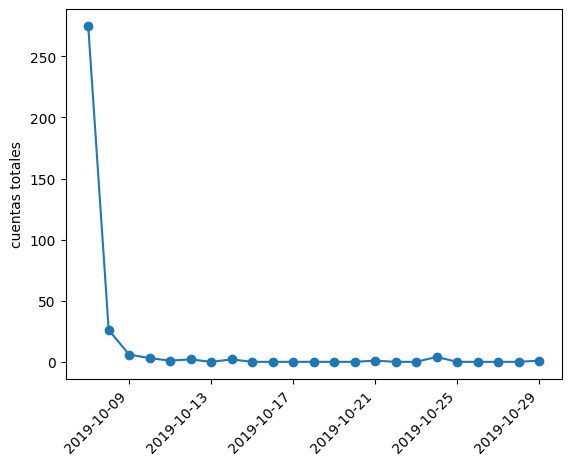

In [40]:
fecha_inicial = dias_kici[0]
fecha_final = dias_kici[-1]
fechas = []

# Bucle para generar las fechas en el rango
fecha_actual = fecha_inicial
while fecha_actual <= fecha_final:
    fechas.append(fecha_actual)
    fecha_actual += timedelta(days=1)  # Incrementar la fecha en un día

# Imprimir las fechas generadas
for fecha in fechas:
    fecha_str = fecha.strftime('%a %b %d %H:%M:%S %z %Y')
count =[]
for i in fechas:
    count.append(dias_kici.count(i))
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fechas, count, 'o-')
plt.ylabel('cuentas totales')
plt.xticks(rotation=45, ha='right')

plt.show()


In [36]:
fechas

DatetimeIndex(['2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10',
               '2019-10-11', '2019-10-12', '2019-10-13', '2019-10-14',
               '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18',
               '2019-10-19', '2019-10-20', '2019-10-21', '2019-10-22',
               '2019-10-23', '2019-10-24', '2019-10-25', '2019-10-26',
               '2019-10-27', '2019-10-28', '2019-10-29'],
              dtype='datetime64[ns]', freq='D')

In [21]:
dias_kici[0]

'Mon Oct 07 02:33:55 +0000 2019'

In [22]:
dias_kici

['Mon Oct 07 02:33:55 +0000 2019',
 'Mon Oct 07 02:38:06 +0000 2019',
 'Mon Oct 07 02:48:17 +0000 2019',
 'Mon Oct 07 02:55:18 +0000 2019',
 'Mon Oct 07 02:59:40 +0000 2019',
 'Mon Oct 07 03:11:49 +0000 2019',
 'Mon Oct 07 03:18:40 +0000 2019',
 'Mon Oct 07 03:18:28 +0000 2019',
 'Mon Oct 07 03:18:17 +0000 2019',
 'Mon Oct 07 03:22:23 +0000 2019',
 'Mon Oct 07 03:24:21 +0000 2019',
 'Mon Oct 07 03:27:14 +0000 2019',
 'Mon Oct 07 03:39:04 +0000 2019',
 'Mon Oct 07 03:40:41 +0000 2019',
 'Mon Oct 07 03:43:41 +0000 2019',
 'Mon Oct 07 03:42:47 +0000 2019',
 'Mon Oct 07 03:49:41 +0000 2019',
 'Mon Oct 07 04:03:08 +0000 2019',
 'Mon Oct 07 04:05:37 +0000 2019',
 'Mon Oct 07 04:23:07 +0000 2019',
 'Mon Oct 07 04:24:16 +0000 2019',
 'Mon Oct 07 04:31:33 +0000 2019',
 'Mon Oct 07 04:36:20 +0000 2019',
 'Mon Oct 07 04:37:32 +0000 2019',
 'Mon Oct 07 04:40:46 +0000 2019',
 'Mon Oct 07 04:43:06 +0000 2019',
 'Mon Oct 07 04:45:05 +0000 2019',
 'Mon Oct 07 04:50:19 +0000 2019',
 'Mon Oct 07 04:49:3

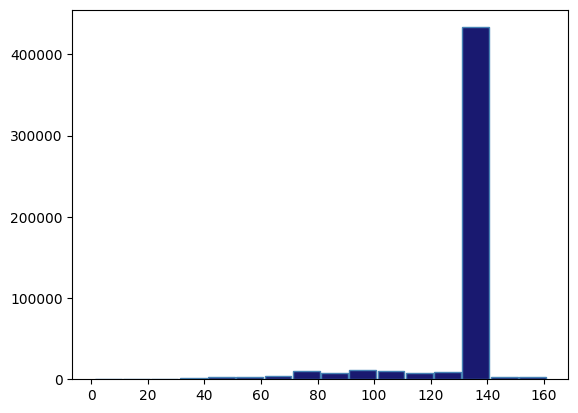

In [118]:
import matplotlib.pyplot as plt
import numpy as np
bins = np.arange(1, 170, 10)
plt.hist(words, bins  = bins, density=False, edgecolor = 'steelblue', align='mid', rwidth=0.95, color  = 'midnightblue')
plt.vlines(140, ymax = 0.06, ymin = 0, color = 'r')
#np.where(np.array(words)>140)

In [119]:
words


[140,
 139,
 59,
 139,
 139,
 139,
 140,
 140,
 140,
 140,
 91,
 139,
 89,
 140,
 139,
 140,
 286,
 190,
 139,
 116,
 139,
 139,
 139,
 125,
 140,
 140,
 140,
 133,
 251,
 79,
 139,
 139,
 139,
 139,
 140,
 140,
 140,
 140,
 140,
 140,
 139,
 139,
 140,
 140,
 163,
 139,
 140,
 139,
 140,
 140,
 140,
 140,
 104,
 140,
 56,
 140,
 139,
 140,
 140,
 139,
 186,
 140,
 140,
 140,
 140,
 171,
 56,
 140,
 199,
 116,
 139,
 203,
 86,
 140,
 140,
 140,
 140,
 139,
 140,
 140,
 139,
 140,
 140,
 139,
 140,
 140,
 140,
 140,
 140,
 140,
 139,
 140,
 140,
 139,
 82,
 140,
 273,
 63,
 140,
 62,
 140,
 74,
 139,
 140,
 140,
 139,
 140,
 140,
 139,
 93,
 52,
 140,
 140,
 140,
 140,
 139,
 63,
 83,
 140,
 139,
 140,
 139,
 139,
 139,
 140,
 139,
 140,
 140,
 139,
 139,
 69,
 140,
 61,
 140,
 130,
 70,
 139,
 83,
 140,
 140,
 139,
 140,
 140,
 140,
 140,
 140,
 140,
 211,
 140,
 140,
 139,
 140,
 140,
 140,
 140,
 140,
 139,
 140,
 139,
 140,
 140,
 111,
 140,
 140,
 140,
 110,
 81,
 140,
 140,
 139,


In [1]:
import json
import re
filename = 'd:/Facultad/Tesis/Twitter/201910-alferdez.txt'

def take_url(json_data):
    try:
        url = json_data['urls'][0]['expanded_url']
    except:
        url = ''
    return url

def replace(x):
    x = str(x)
    x = x.replace('”', '"')
    x = x.replace('“', '"')
    x = x.replace('”', '"')
    x = x.replace('\x93', '"')
    x = x.replace('\x94', '"')
    

def extract_quotes(x):
    return re.findall('"([^"]*)"', x)
# with open(filename, 'r', encoding = "utf8") as fp:
#     for line in fp:
#         json_data = json.loads(line)
words = []
cont = 0
dias_kici = []
frases_kici = []
urls = []
with open(filename, 'r', encoding = "utf8") as fp:
    for i, line in enumerate(fp):
        # Para cada linea lee el json y extrae la fecha
        json_data = json.loads(line)
        url = take_url(json_data)
        tweet = json_data['text']
        url = json_data['urls']
        extra = json_data



        if tweet[0:2] != 'RT':
            user = json_data['user']
            frases_kici.append(tweet)
            dias_kici.append(json_data['created_at'])
            try:
                urls.append(url[0]['url'])
            except:
                urls.append(0)
            # try:
            #     url = url[0]['url']
            #     t = tweet.replace(str(url), "")
            #     print('nue', t)
            # except:
            #     pass
            #tweet = replace(tweet)
            # citas = extract_quotes(tweet)
            # if len(citas)>0:
            #     for i in citas:
            #         dias_kici.append(json_data['created_at'])
            #         frases_kici.append(i)
            #         #if "dedica a vender droga" in i:
            #         #dias_kici.append(json_data['created_at'])
            
            #if citas != []:
                #print(citas)
                # if "dedica a vender droga" in citas[0]:
                #     cont +=1
            
            
            # if user['screen_name'] == 'infobae'
            #     print(i, tweet, '\n')

        # if i == 147:
        #     url = json_data['urls']
        #     id = json_data['user']
        #     print(i, tweet, url, '\n')
        #     print('id', id)
            # hashtags[0:2] == 'RT' its retweet or not
        # print(tweet)
        # print(extra)
        # if 'Kicillof dice que a Macri ellos lo engramparon con una deuda de 200 mil millones de dólares. Igual, el cabeza de tacho' in tweet:
        #     print(extra)
        # if i >500:
        #     break
#
# keys = json_data.keys()

In [ ]:
import json
import re
filename = 'd:/Facultad/Tesis/Twitter/201910-alferdez.txt'

def take_url(json_data):
    try:
        url = json_data['urls'][0]['expanded_url']
    except:
        url = ''
    return url

def replace(x):
    x = str(x)
    x = x.replace('”', '"')
    x = x.replace('“', '"')
    x = x.replace('”', '"')
    x = x.replace('\x93', '"')
    x = x.replace('\x94', '"')
    

def extract_quotes(x):
    return re.findall('"([^"]*)"', x)

def salvando_tweets(filename):
    dias = []
    frases = []
    urls = []
    with open(filename, 'r', encoding = "utf8") as fp:
        for i, line in enumerate(fp):
            # Para cada linea lee el json y extrae la fecha
            json_data = json.loads(line)
            url = take_url(json_data)
            tweet = json_data['text']
            url = json_data['urls']
            extra = json_data



            if tweet[0:2] != 'RT':
                user = json_data['user']
                frases.append(tweet)
                dias.append(json_data['created_at'])
                try:
                    urls.append(url[0]['url'])
                except:
                    urls.append(0)

        return frases, dias, urls

In [2]:
import pandas as pd

def borrar_url(tweet, url):
    if urls != 0:
        try:
            t = tweet.replace(str(url), "")     
        except:
            t = tweet
    else:
        t = tweet
    return t
p = pd.DataFrame({'Tweets': frases_kici, 'Fecha': dias_kici, 'urls': urls})
p['Tweets_sin_url'] = p.apply(lambda row: borrar_url(row['Tweets'], row['urls']), axis = 1)
p.to_csv("Tweets_alberto_oct.csv")